In [25]:
"""from keras.layers import Input, Dense
from keras.models import Model
from keras import regularizers

from keras.layers import Input, Dense, Conv2D, MaxPooling2D, UpSampling2D
from keras.models import Model
from keras import backend as K
from keras.callbacks import TensorBoard
from keras.callbacks import ModelCheckpoint
from keras.callbacks import EarlyStopping
"""
from keras.datasets import mnist
import numpy as np
import matplotlib.pyplot as plt
import pathlib
import json
import math

In [26]:
FILE_NAME = "file(5)"
PREDICT_PICTURE = 20
SEED = 15

In [27]:
loss_functions = ['binary_crossentropy', 'mean_squared_error']
index_arch = range(18)
optimizers = ['adadelta', 'sgd', 'RMSprop', 'adam']
regularizers_func = range(3)
regular = range(len(regularizers_func))
kernel_sizes = [3,5,7]

best_models = {"setting":[[1,8,3,0,0],[1,16,3,0,0],[1,17,3,0,0]]}
mod_comb = [{"los": loss_functions[x[0]], "arch":index_arch[x[1]],
             "opt":optimizers[x[2]], "reg_indx":regular[x[3]],
             "ksize":kernel_sizes[x[4]] } for x in best_models['setting']]
#mod_comb.append({"los": loss_functions[1], "arch":index_arch[6], "opt":optimizers[3]})
print(len(mod_comb))
print(mod_comb)

3
[{'los': 'mean_squared_error', 'arch': 8, 'opt': 'adam', 'reg_indx': 0, 'ksize': 3}, {'los': 'mean_squared_error', 'arch': 16, 'opt': 'adam', 'reg_indx': 0, 'ksize': 3}, {'los': 'mean_squared_error', 'arch': 17, 'opt': 'adam', 'reg_indx': 0, 'ksize': 3}]


In [28]:
(x_train, _), (x_test, _) = mnist.load_data()
size_image = 28

x_train = x_train.astype('float32') / 255.
x_test = x_test.astype('float32') / 255.
x_train = np.reshape(x_train, (len(x_train), size_image, size_image, 1))  # adapt this if using `channels_first` image data format
x_test = np.reshape(x_test, (len(x_test), size_image, size_image, 1))  # adapt this if using `channels_first` image data format


np.random.seed=SEED
noise_factor = 0.5
x_train_noisy = x_train + noise_factor * np.random.normal(loc=0.0, scale=1.0, size=x_train.shape) 
x_test_noisy = x_test + noise_factor * np.random.normal(loc=0.0, scale=1.0, size=x_test.shape) 

x_train_noisy = np.clip(x_train_noisy, 0., 1.)
x_test_noisy = np.clip(x_test_noisy, 0., 1.)

In [29]:
print("x_train: ",x_train.shape,"x_t_noisy: ",x_train_noisy.shape)
original = x_test_noisy[:PREDICT_PICTURE].flatten()*255.

x_train:  (60000, 28, 28, 1) x_t_noisy:  (60000, 28, 28, 1)


In [30]:
cases = [] #Тут будут возможные варианты настойки НС
val_losses = []
losses = []
mse_pred = []
pnsr_pred = []
predicts = []
for i_mod, mod in enumerate(mod_comb):
    info = str(mod)
    add = "_{}".format(i_mod)
    path = './out/{}.json'.format(FILE_NAME+add)
    try:
        with open(path, "r", encoding="utf-8") as f:
            a = json.load(f)
            cases.append([[add], [a['info']]])
            val_losses.append(min(a['history']['val_loss']))
            losses.append(min(a['history']['loss']))

            predicts.append(a['predict'])
            predict = np.array(a['predict']).flatten()*255
            mse = np.array([])
            for i in range(len(predict)):
                value = (original[i]-predict[i])**2
                mse = np.append(mse,value)
            mse_pred.append(mse.mean())
            pnsr_pred.append( 20 * math.log10(255 / (mse_pred[-1] ** 0.5)) )
    except Exception: 
        print("File missing {}".format(path))


                        
#print("Successful!\n","Mse: {}, PNSR: {}".format(len(mse_pred),len(pnsr_pred)))

In [31]:
predicts = np.array(predicts)
print(predicts.shape)

(3, 20, 28, 28, 1)


In [32]:
def show_picture(predicts, n =10):
    plt.figure(figsize=(20, 4))
    for i in range(n):
        ax = plt.subplot(1, n, i + 1)
        plt.imshow(np.reshape(predicts[i], (28,28)))
        plt.gray()
        ax.get_xaxis().set_visible(False)
        ax.get_yaxis().set_visible(False)
    plt.show()

x_train:  (60000, 28, 28, 1) x_t_noisy:  (60000, 28, 28, 1)


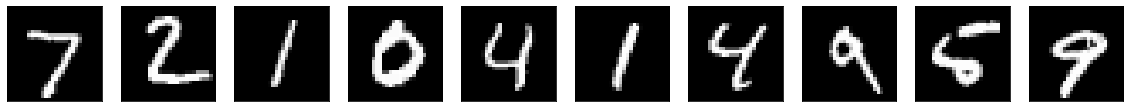

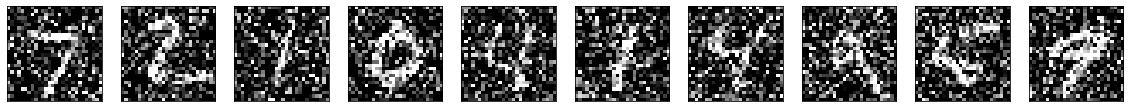

In [33]:
print("x_train: ",x_train.shape,"x_t_noisy: ",x_train_noisy.shape)
show_picture(x_test)
show_picture(x_test_noisy)

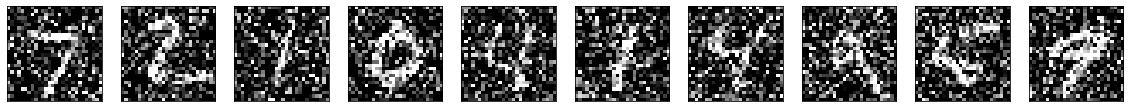

0) loss: mean_squared_error, arch: 8, opt: adam, reg_index: 0, ksize: 3


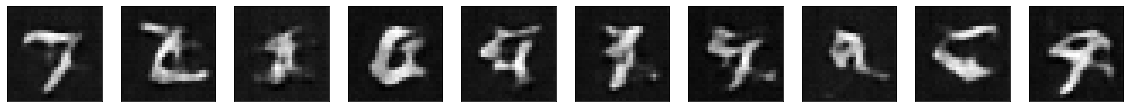

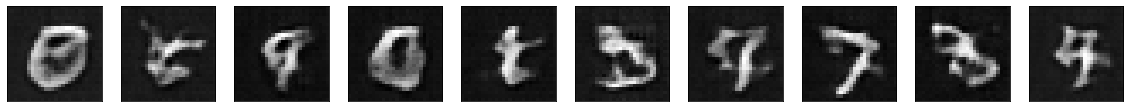

1) loss: mean_squared_error, arch: 16, opt: adam, reg_index: 0, ksize: 3


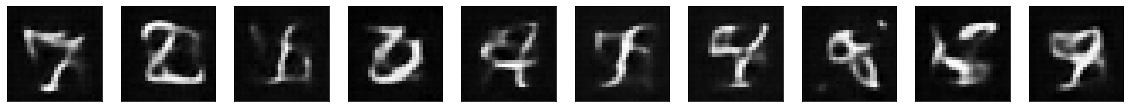

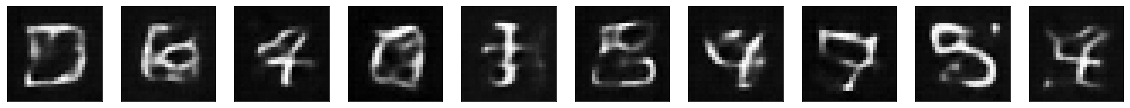

2) loss: mean_squared_error, arch: 17, opt: adam, reg_index: 0, ksize: 3


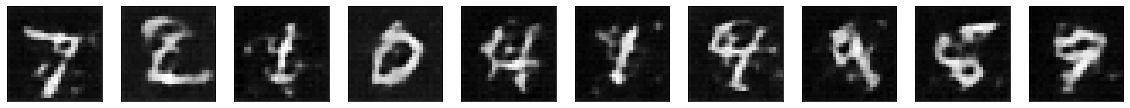

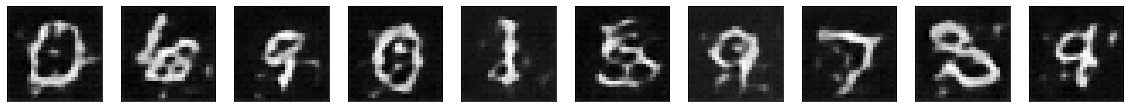

In [40]:
def show_result(i):
    print("{}) loss: {}, arch: {}, opt: {}, reg_index: {}, ksize: {}".format(i,mod_comb[i]['los'],mod_comb[i]['arch'],
                         mod_comb[i]['opt'],mod_comb[i]['reg_indx'],mod_comb[i]['ksize'] ))
    try:
        show_picture(predicts[i][:10])
        show_picture(predicts[i][10:])
    except Exception:
        print("{}) Не обучена".format(i))
        
        
        
show_picture(x_test_noisy)
for i in range(len(mod_comb)):
    show_result(i)


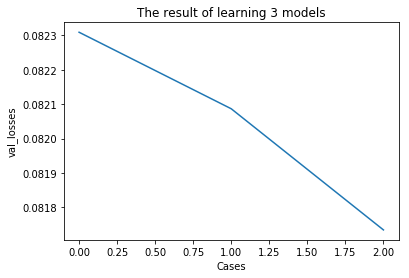

Top best 10
(2, 0.0817342147231102)   ["{'los': 'mean_squared_error', 'arch': 17, 'opt': 'adam', 'reg_indx': 0, 'ksize': 3}"]
(1, 0.08208664879202843)   ["{'los': 'mean_squared_error', 'arch': 16, 'opt': 'adam', 'reg_indx': 0, 'ksize': 3}"]
(0, 0.0823093132674694)   ["{'los': 'mean_squared_error', 'arch': 8, 'opt': 'adam', 'reg_indx': 0, 'ksize': 3}"]
Top worst 10
(0, 0.0823093132674694)   ["{'los': 'mean_squared_error', 'arch': 8, 'opt': 'adam', 'reg_indx': 0, 'ksize': 3}"]
(1, 0.08208664879202843)   ["{'los': 'mean_squared_error', 'arch': 16, 'opt': 'adam', 'reg_indx': 0, 'ksize': 3}"]
(2, 0.0817342147231102)   ["{'los': 'mean_squared_error', 'arch': 17, 'opt': 'adam', 'reg_indx': 0, 'ksize': 3}"]


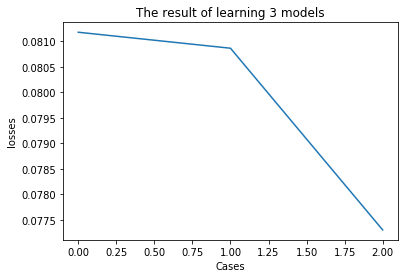

Top best 10
(2, 0.07729964766651393)   ["{'los': 'mean_squared_error', 'arch': 17, 'opt': 'adam', 'reg_indx': 0, 'ksize': 3}"]
(1, 0.08086745736499627)   ["{'los': 'mean_squared_error', 'arch': 16, 'opt': 'adam', 'reg_indx': 0, 'ksize': 3}"]
(0, 0.08118119187653065)   ["{'los': 'mean_squared_error', 'arch': 8, 'opt': 'adam', 'reg_indx': 0, 'ksize': 3}"]
Top worst 10
(0, 0.08118119187653065)   ["{'los': 'mean_squared_error', 'arch': 8, 'opt': 'adam', 'reg_indx': 0, 'ksize': 3}"]
(1, 0.08086745736499627)   ["{'los': 'mean_squared_error', 'arch': 16, 'opt': 'adam', 'reg_indx': 0, 'ksize': 3}"]
(2, 0.07729964766651393)   ["{'los': 'mean_squared_error', 'arch': 17, 'opt': 'adam', 'reg_indx': 0, 'ksize': 3}"]


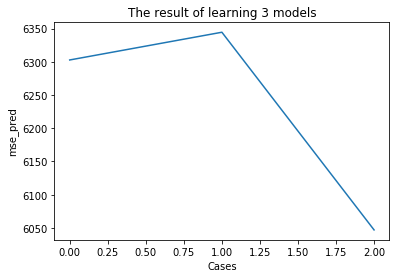

Top best 10
(2, 6047.000118896189)   ["{'los': 'mean_squared_error', 'arch': 17, 'opt': 'adam', 'reg_indx': 0, 'ksize': 3}"]
(0, 6302.667412243788)   ["{'los': 'mean_squared_error', 'arch': 8, 'opt': 'adam', 'reg_indx': 0, 'ksize': 3}"]
(1, 6344.378596788948)   ["{'los': 'mean_squared_error', 'arch': 16, 'opt': 'adam', 'reg_indx': 0, 'ksize': 3}"]
Top worst 10
(1, 6344.378596788948)   ["{'los': 'mean_squared_error', 'arch': 16, 'opt': 'adam', 'reg_indx': 0, 'ksize': 3}"]
(0, 6302.667412243788)   ["{'los': 'mean_squared_error', 'arch': 8, 'opt': 'adam', 'reg_indx': 0, 'ksize': 3}"]
(2, 6047.000118896189)   ["{'los': 'mean_squared_error', 'arch': 17, 'opt': 'adam', 'reg_indx': 0, 'ksize': 3}"]


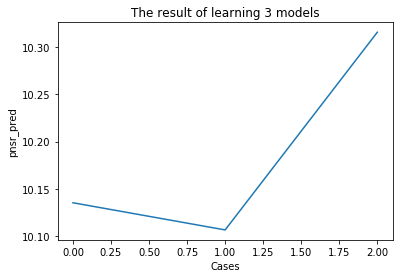

Top best 10
(1, 10.106912695359316)   ["{'los': 'mean_squared_error', 'arch': 16, 'opt': 'adam', 'reg_indx': 0, 'ksize': 3}"]
(0, 10.135559705816155)   ["{'los': 'mean_squared_error', 'arch': 8, 'opt': 'adam', 'reg_indx': 0, 'ksize': 3}"]
(2, 10.315403837228654)   ["{'los': 'mean_squared_error', 'arch': 17, 'opt': 'adam', 'reg_indx': 0, 'ksize': 3}"]
Top worst 10
(2, 10.315403837228654)   ["{'los': 'mean_squared_error', 'arch': 17, 'opt': 'adam', 'reg_indx': 0, 'ksize': 3}"]
(0, 10.135559705816155)   ["{'los': 'mean_squared_error', 'arch': 8, 'opt': 'adam', 'reg_indx': 0, 'ksize': 3}"]
(1, 10.106912695359316)   ["{'los': 'mean_squared_error', 'arch': 16, 'opt': 'adam', 'reg_indx': 0, 'ksize': 3}"]


In [35]:
top_count = 10
functions = [val_losses, losses, mse_pred, pnsr_pred]
functions_titile = ["val_losses", "losses", "mse_pred", "pnsr_pred"]
for i in range(len(functions)):
    test_func = functions[i]
    xlist = range(len(test_func))
    plt.plot(xlist, test_func,label="val_losses")
    plt.xlabel("Cases")
    plt.ylabel(functions_titile[i])
    plt.title("The result of learning {} models".format(len(val_losses)))
    plt.show()
    
    mas = sorted(list(enumerate(test_func)), key = lambda tup: tup[1])[:top_count]
    mas2 = []
    for t in mas:
        mas2.append(cases[t[0]])
    print("Top best {}".format(top_count))
    for j in range(len(mas)):
        print(mas[j]," ",mas2[j][1])
        
    worst1 = sorted(list(enumerate(test_func)), key = lambda tup: tup[1], reverse = True)[:top_count]
    worst2 = []
    for t in worst1:
        worst2.append(cases[t[0]])
    print("Top worst {}".format(top_count))
    for j in range(len(worst1)):
        print(worst1[j]," ",worst2[j][1])
    

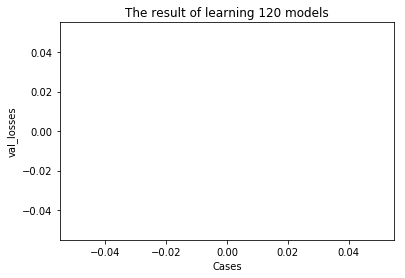

Top best 10
Top worst 10


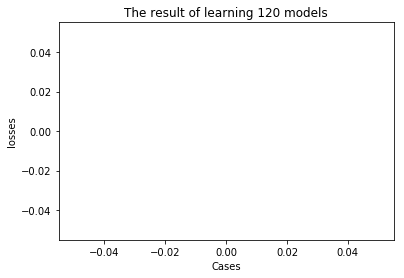

Top best 10
Top worst 10


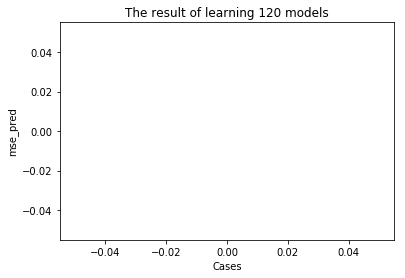

Top best 10
Top worst 10


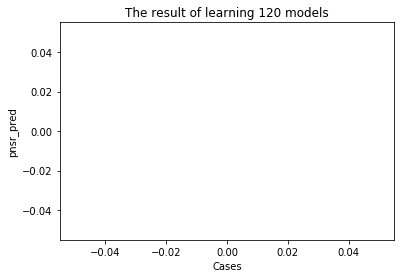

Top best 10
Top worst 10


In [36]:
my_string = "binary_crossentropy"
top_count = 10
functions = [val_losses, losses, mse_pred, pnsr_pred]
functions_titile = ["val_losses", "losses", "mse_pred", "pnsr_pred"]
for i in range(len(functions)):
    test_func = []
    for j in range(len(functions[i])):
        if(cases[j][1][0].find(my_string) >= 0): test_func.append(functions[i][j])
    xlist = range(len(test_func))
    plt.plot(xlist, test_func,label="val_losses")
    plt.xlabel("Cases")
    plt.ylabel(functions_titile[i])
    plt.title("The result of learning 120 models")
    plt.show()
    
    
    raw_data = []
    for tup in list(enumerate(functions[i])):
        if (cases[tup[0]][1][0].find(my_string))>0: raw_data.append(tup)
    
    mas = sorted(raw_data,
                 key = lambda tup: tup[1])[:top_count]
    mas2 = []
    for t in mas:
        mas2.append(cases[t[0]])
    print("Top best {}".format(top_count))
    for j in range(len(mas)):
        print(mas[j]," ",mas2[j][1])
        
    worst1 = sorted(raw_data,
                    key = lambda tup: tup[1], reverse = True)[:top_count]
    worst2 = []
    for t in worst1:
        worst2.append(cases[t[0]])
    print("Top worst {}".format(top_count))
    for j in range(len(worst1)):
        print(worst1[j]," ",worst2[j][1])
    

In [37]:
my_string = "reg: 1"
top_count = 10
functions = [val_losses, losses, mse_pred, pnsr_pred]
functions_titile = ["val_losses", "losses", "mse_pred", "pnsr_pred"]

result_models = []
for i in range(len(val_losses)):
    if (not((val_losses[i] > 0.6) | (losses[i] > 0.6) | (mse_pred[i] > 5000) | (pnsr_pred[i] < 20) )):
        result_models.append((i, val_losses[i], losses[i], mse_pred[i], pnsr_pred[i]))
        
    

In [38]:
print(np.array(result_models).shape)
for i in result_models:
    print(i, cases[i[0]][0][0])
    show_picture(predicts[i[0]])

(0,)


In [39]:
best_models = []
for i in result_models:
    temp = cases[i[0]][0][0].split("-")
    best_models.append([int(x) for x in temp])
best_models = {"setting": best_models}
print(best_models)

{'setting': []}


In [42]:
with open("best.json", "w", encoding="utf-8") as file:
        json.dump(best_models,file)